## Perceptron

In [51]:
import pandas as pd
from data import *

In [52]:
repetitions = 200

In [53]:
estimate_func_unipolar = lambda v: unipolar(0, v)
x_all_unipolar = reproduce_x_times(x_unipolar, repetitions)
d_all_unipolar = reproduce_x_times(d_unipolar, repetitions)
x_all_unipolar = x_all_unipolar + get_random_except_first_row(x_all_unipolar.shape)
x_all_unipolar[:, :5], d_all_unipolar[:, :5]

(array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00],
        [-1.82360925e-02, -8.17301385e-04,  9.90439940e-01,
          9.71940060e-01, -3.19130718e-02],
        [ 1.50485189e-02,  9.58486872e-01, -1.42599963e-02,
          1.04351226e+00, -2.19177607e-02]]),
 array([[0, 0, 0, 1, 0]]))

In [54]:
estimate_func_bipolar = lambda v: bipolar(0, v)
x_all_bipolar = reproduce_x_times(x_bipolar, repetitions)
d_all_bipolar = reproduce_x_times(d_bipolar, repetitions)
x_all_bipolar = x_all_bipolar + get_random_except_first_row(x_all_bipolar.shape)
x_all_bipolar[:, :5], d_all_bipolar[:, :5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-0.95095886, -1.04142933,  1.00576101,  0.98407361, -0.98765553],
        [-1.03581246,  0.96865242, -1.00668623,  0.99870675, -1.0145938 ]]),
 array([[-1, -1, -1,  1, -1]]))

In [55]:
test_size = int(x_all_unipolar.shape[1] * 0.25)
train_size = int(x_all_unipolar.shape[1] - test_size)

In [56]:
x_train_unipolar, x_test_unipolar = x_all_unipolar[:, :train_size], x_all_unipolar[:, train_size:]
d_train_unipolar, d_test_unipolar = d_all_unipolar[:, :train_size], d_all_unipolar[:, train_size:]
x_train_unipolar.shape, x_test_unipolar.shape, d_train_unipolar.shape, d_test_unipolar.shape

((3, 600), (3, 200), (1, 600), (1, 200))

In [57]:
x_train_bipolar, x_test_bipolar = x_all_bipolar[:, :train_size], x_all_bipolar[:, train_size:]
d_train_bipolar, d_test_bipolar = d_all_bipolar[:, :train_size], d_all_bipolar[:, train_size:]
x_train_bipolar.shape, x_test_bipolar.shape, d_train_bipolar.shape, d_test_bipolar.shape

((3, 600), (3, 200), (1, 600), (1, 200))

In [58]:
x_range = np.arange(-2, 4)
experiments_numb = 100

In [59]:
perceptrons_unipolar = []
perceptrons_bipolar = []
for w_range in list(np.linspace(0, 1, num=100))[1:]:
    p_unipolar = Perceptron(x_train_unipolar, d_train_unipolar, x_test_unipolar, d_test_unipolar, estimate_func_unipolar, 0.1, (-w_range, w_range))
    p_bipolar = Perceptron(x_train_bipolar, d_train_bipolar, x_test_bipolar, d_test_bipolar, estimate_func_bipolar, 0.1, (-w_range, w_range))
    for i in range(experiments_numb):
        p_unipolar.count()
        p_bipolar.count()
    perceptrons_unipolar.append(p_unipolar)
    perceptrons_bipolar.append(p_bipolar)
len(perceptrons_unipolar), len(perceptrons_bipolar)

(99, 99)

,"weights range (-v, v)",epoch count unipolar,epoch count bipolar
0,0.010101,6.96,2.93
1,0.020202,7.14,2.79
2,0.030303,7.03,2.87
3,0.040404,7.01,2.86
4,0.050505,7.25,2.76
5,0.060606,7.28,2.87
6,0.070707,7.05,2.88
7,0.080808,7.26,2.83
8,0.090909,6.95,2.89
9,0.101010,7.62,2.78


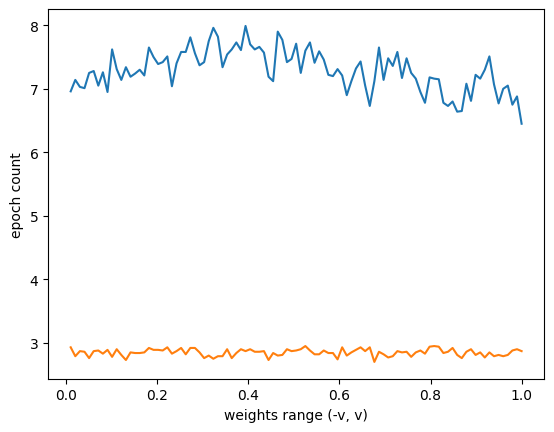

In [60]:
plt.plot([x.wrange[1] for x in perceptrons_unipolar], [x.average_epoch_count for x in perceptrons_unipolar])
plt.plot([x.wrange[1] for x in perceptrons_bipolar], [x.average_epoch_count for x in perceptrons_bipolar])
plt.xlabel("weights range (-v, v)")
plt.ylabel("epoch count")
pd.DataFrame({"weights range (-v, v)":[x.wrange[1] for x in perceptrons_unipolar],
              "epoch count unipolar":[x.average_epoch_count for x in perceptrons_unipolar],
              "epoch count bipolar":[x.average_epoch_count for x in perceptrons_bipolar]}).head(10)

In [61]:
perceptrons_unipolar = []
perceptrons_bipolar = []
for alfa in list(np.linspace(0, 1, num=100))[1:]:
    p_unipolar = Perceptron(x_train_unipolar, d_train_unipolar, x_test_unipolar, d_test_unipolar, estimate_func_unipolar, alfa, (-0.1, 0.1))
    p_bipolar = Perceptron(x_train_bipolar, d_train_bipolar, x_test_bipolar, d_test_bipolar, estimate_func_bipolar, alfa, (-0.1, 0.1))
    for i in range(experiments_numb):
        p_unipolar.count()
        p_bipolar.count()
    perceptrons_unipolar.append(p_unipolar)
    perceptrons_bipolar.append(p_bipolar)
len(perceptrons_unipolar), len(perceptrons_bipolar)

(99, 99)

,alfas,epoch count unipolar,epoch count bipolar
0,0.010101,6.58,2.81
1,0.020202,7.56,2.84
2,0.030303,8.19,2.78
3,0.040404,7.15,2.85
4,0.050505,7.37,2.92
5,0.060606,7.05,2.83
6,0.070707,7.29,2.93
7,0.080808,6.98,2.93
8,0.090909,7.26,2.76
9,0.101010,7.38,2.91


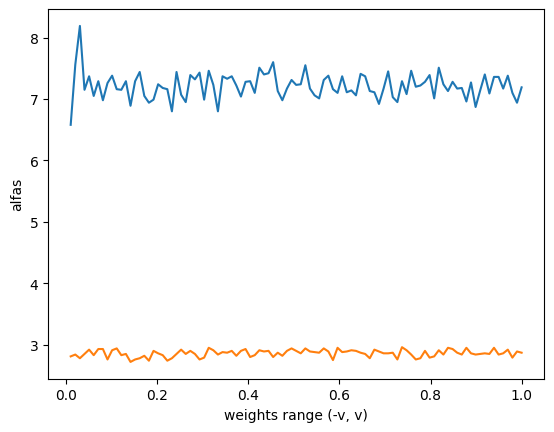

In [62]:
plt.plot([x.alfa for x in perceptrons_unipolar], [x.average_epoch_count for x in perceptrons_unipolar])
plt.plot([x.alfa for x in perceptrons_bipolar], [x.average_epoch_count for x in perceptrons_bipolar])
plt.xlabel("weights range (-v, v)")
plt.ylabel("alfas")
pd.DataFrame({"alfas": [x.alfa for x in perceptrons_unipolar],
              "epoch count unipolar": [x.average_epoch_count for x in perceptrons_unipolar],
              "epoch count bipolar": [x.average_epoch_count for x in perceptrons_bipolar]}).head(10)